<a href="https://colab.research.google.com/github/charurathour/MLprojects/blob/main/Cars24_Data_Analysis_and_Model_Building.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Cars24 Kaggle Dataset Analysis and Model building**
### **Introduction**
#### This project focuses on analyzing a used car dataset sourced from Kaggle, originally scraped from Cars24. The dataset captures key attributes of pre-owned vehicles, including model, manufacturing year, price, mileage, engine capacity, fuel type, transmission, ownership history, and condition details. Through this analysis, we aim to derive meaningful insights into pricing patterns, depreciation trends, and factors influencing market demand.

In [1]:
# Setup and Imports
!pip install pandas
import pandas as pd
!pip install matplotlib
import matplotlib.pyplot as plt
!pip install seaborn
import seaborn as sns
!pip install numpy
import numpy as np

In [ ]:
# Install kagglehub
!pip install kagglehub
import kagglehub

# Download the dataset
path = kagglehub.dataset_download("amanrajput16/used-car-price-data-from-cars24")

# Confirm download
print("Path to dataset files:", path)

In [171]:
import os

dataset_path = "/root/.cache/kagglehub/datasets/amanrajput16/used-car-price-data-from-cars24/versions/1"
print(os.listdir(dataset_path))

['cars24data.csv']


In [172]:
import pandas as pd

file_path = os.path.join(dataset_path, 'cars24data.csv')
df = pd.read_csv(file_path)

# Preview the data
df.head()

,Model Name,Price,Manufacturing_year,Engine capacity,Spare key,Transmission,KM driven,Ownership,Fuel type,Imperfections,Repainted Parts
0,2017 Maruti Swift VXI,561000,2017,1197,No,Manual,25847,2,Petrol,6,2
1,2016 Maruti Baleno DELTA PETROL 1.2,498000,2016,1197,Yes,Manual,55511,2,Petrol,12,1
2,2020 Maruti Swift VXI,577000,2020,1197,No,Manual,47110,1,Petrol,4,2
3,2022 Maruti Ertiga VXI AT SHVS,1084000,2022,1462,Yes,Automatic,35378,1,Petrol,2,3
4,2019 Maruti Dzire VXI,603000,2019,1197,Yes,Manual,91856,1,Petrol,3,2


In [173]:
'''small preprocessing for extracting model variant as this column consist of year also,
 more careful processing can be done after full analysis of column
 after which spelling mistake and other things can be taken care of'''

# Extract the third word unless it's a single character or "New", then take the fourth
df['Variant'] = df['Model Name'].apply(lambda x:
                                 x.split(' ')[3] if
                                 (len(x.split(' ')[2]) == 1 or x.split(' ')[2].lower() == 'new')
                                 else x.split(' ')[2]
                                  )

# Confirm the change
df[['Model Name', 'Variant']].head()

,Model Name,Variant
0,2017 Maruti Swift VXI,Swift
1,2016 Maruti Baleno DELTA PETROL 1.2,Baleno
2,2020 Maruti Swift VXI,Swift
3,2022 Maruti Ertiga VXI AT SHVS,Ertiga
4,2019 Maruti Dzire VXI,Dzire


### Exploratory Data Analysis

In [82]:
#Quick checks

# Shape of the dataset
print(f"Dataset shape: {df.shape}")

# Column names and data types
df.info()

# Check for missing values
print(df.isnull().sum())

print("duplicates",df.duplicated().sum())

Dataset shape: (1445, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1445 entries, 0 to 1444
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Model Name          1445 non-null   object
 1   Price               1445 non-null   int64 
 2   Manufacturing_year  1445 non-null   int64 
 3   Engine capacity     1445 non-null   int64 
 4   Spare key           1445 non-null   object
 5   Transmission        1445 non-null   object
 6   KM driven           1445 non-null   int64 
 7   Ownership           1445 non-null   int64 
 8   Fuel type           1445 non-null   object
 9   Imperfections       1445 non-null   int64 
 10  Repainted Parts     1445 non-null   int64 
 11  Variant             1445 non-null   object
dtypes: int64(7), object(5)
memory usage: 135.6+ KB
Model Name            0
Price                 0
Manufacturing_year    0
Engine capacity       0
Spare key             0
Transmission          0



*  This dataset has 1445 number of entries and 11 features among which 4 are
categorical columns and other 7 are numerical columns
*  There are no null values in any columns and there are no duplicates



In [83]:
# Summary of numerical columns
df.describe()

,Price,Manufacturing_year,Engine capacity,KM driven,Ownership,Imperfections,Repainted Parts
count,"1,445.00","1,445.00","1,445.00","1,445.00","1,445.00","1,445.00","1,445.00"
mean,"526,354.33","2,017.82","1,142.10","50,588.90",1.29,9.60,3.23
std,"196,369.62",2.99,169.02,"27,339.56",0.49,8.40,3.36
min,"139,000.00","2,010.00",796.00,"1,207.00",1.00,0.00,0.00
25%,"390,000.00","2,016.00",998.00,"28,803.00",1.00,3.00,0.00
50%,"501,000.00","2,018.00","1,197.00","47,849.00",1.00,8.00,2.00
75%,"631,000.00","2,020.00","1,197.00","70,337.00",2.00,14.00,5.00
max,"1,599,000.00","2,023.00","1,462.00","124,716.00",3.00,43.00,27.00


Cars in this data are manufactured between 2010 and 2023

In [40]:
# Convert price to standard float format
pd.options.display.float_format = '{:,.2f}'.format

# Check the price column
df['Price'].head()

,Price
0,561000
1,498000
2,577000
3,1084000
4,603000


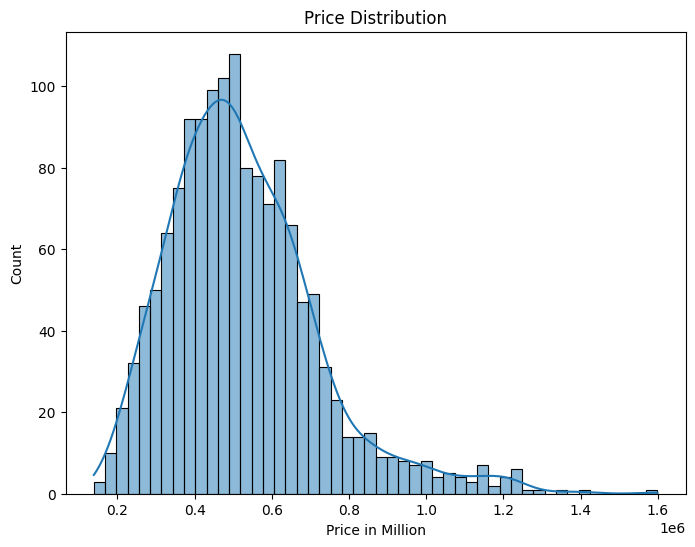

In [84]:
#Price distribution plot
plt.figure(figsize=(8, 6))
sns.histplot(df['Price'], bins=50, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price in Million')
plt.show()

Observation: Most of the cars are priced at 5 Lakh

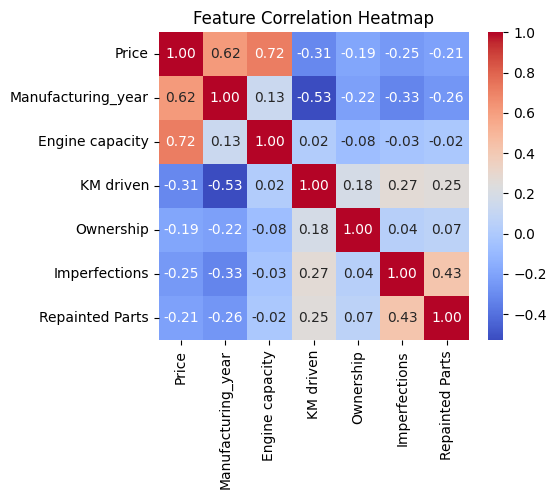

In [85]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Feature correlation map
plt.figure(figsize=(5, 4))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

Observation
*   Price of car is positively related with manufacturing year and engine capacity - Latest the car higher is the price and higher the engine capacity higher is the price
*  Price of car is inversely related to kms driven, number of ownerships and number of imperfections and repainted parts



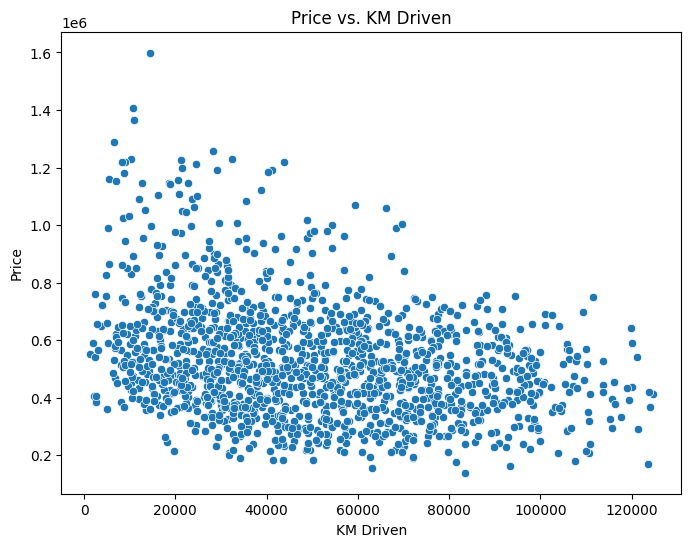

In [48]:
#Price vs km driven
plt.figure(figsize=(8, 6))
sns.scatterplot(x='KM driven', y='Price', data=df)
plt.title('Price vs. KM Driven')
plt.xlabel('KM Driven')
plt.ylabel('Price')
plt.show()

We can observe as kms driven increases prices drops

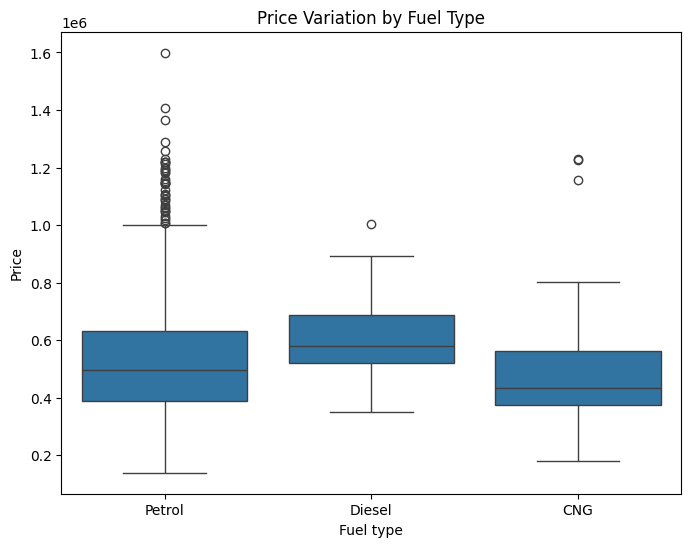

In [49]:
#Let us understand relation between fuel type and Price
plt.figure(figsize=(8, 6))
sns.boxplot(x='Fuel type', y='Price', data=df)
plt.title('Price Variation by Fuel Type')
plt.show()

Observation


*   On an average diesel cars are priced more then petrol then CNG
*   there are a lot of outliers in petrol cars that are highly priced that might be becuase of other parameters



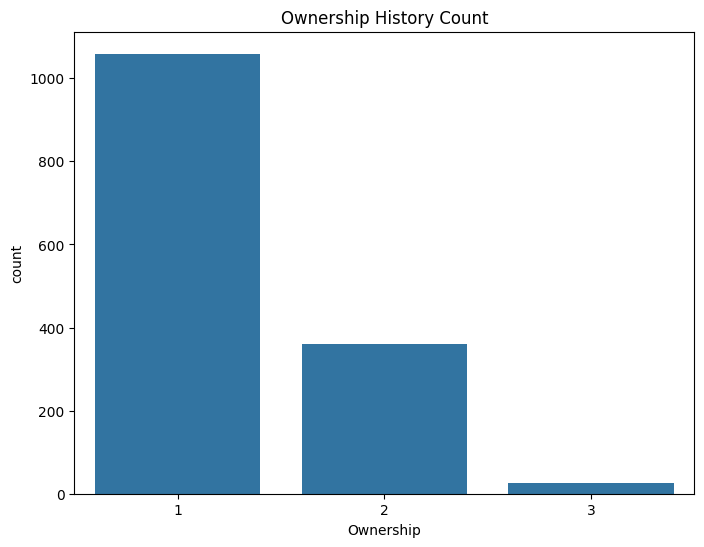

In [51]:
#Number of Ownerships
plt.figure(figsize=(8, 6))
sns.countplot(x='Ownership', data=df)
plt.title('Ownership History Count')
plt.show()

Most of the cars are second hands, very few cars are forth hand and some are third hand

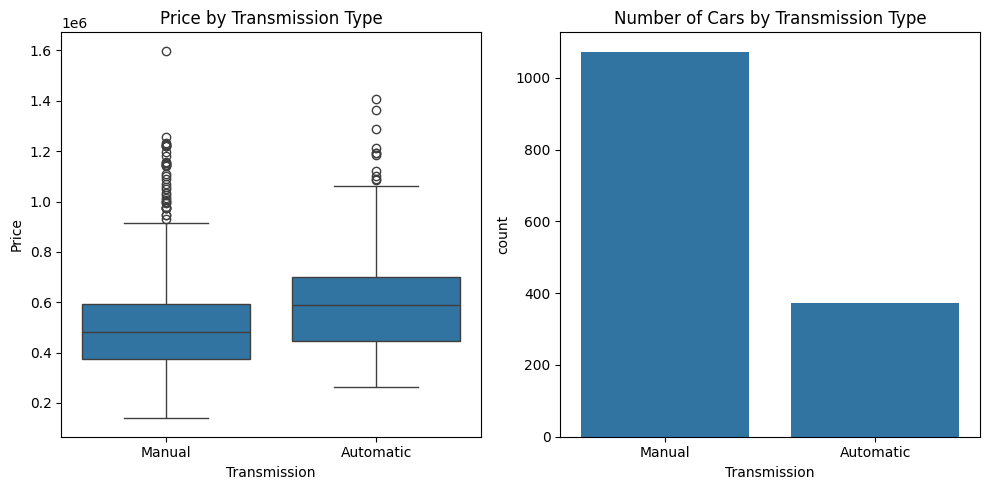

In [57]:
plt.figure(figsize=(10, 5))

# Boxplot for Price by Transmission Type
plt.subplot(1, 2, 1)
sns.boxplot(x='Transmission', y='Price', data=df)
plt.title('Price by Transmission Type')

# Countplot for Number of Cars by Transmission Type
plt.subplot(1, 2, 2)
sns.countplot(x='Transmission', data=df)
plt.title('Number of Cars by Transmission Type')

plt.tight_layout()
plt.show()

Automatic cars are priced more but there are more number of petrol cars

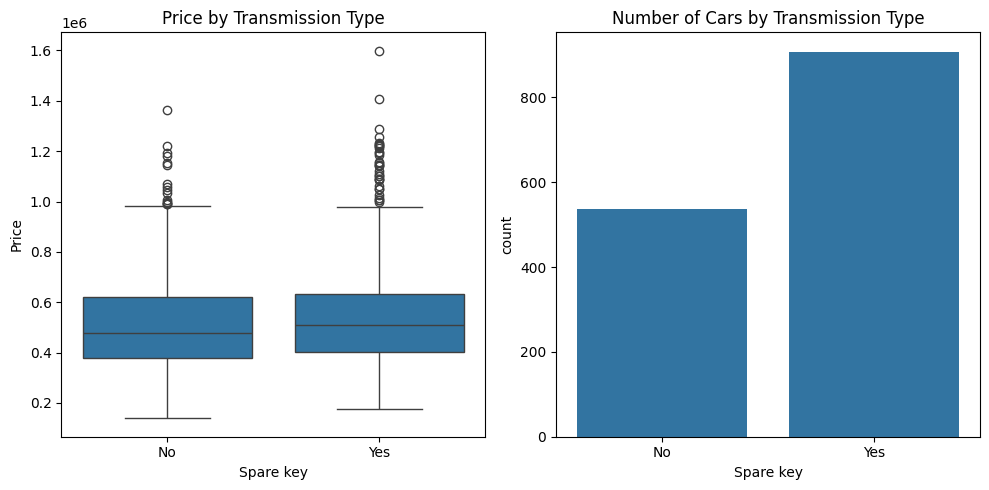

In [61]:
plt.figure(figsize=(10, 5))

# Boxplot for Price by Transmission Type
plt.subplot(1, 2, 1)
sns.boxplot(x='Spare key', y='Price', data=df)
plt.title('Price by Transmission Type')

# Countplot for Number of Cars by Transmission Type
plt.subplot(1, 2, 2)
sns.countplot(x='Spare key', data=df)
plt.title('Number of Cars by Transmission Type')

plt.tight_layout()
plt.show()

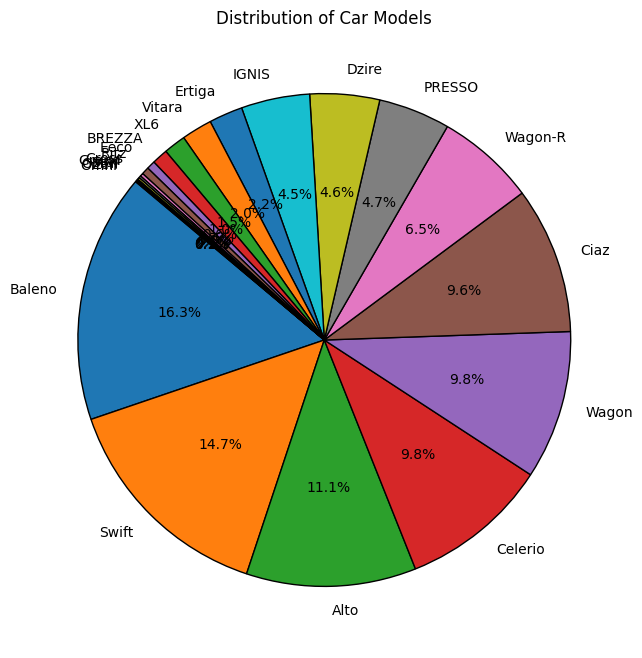

In [75]:
plt.figure(figsize=(8, 8))
model_counts = df['Variant'].value_counts()

plt.pie(model_counts, labels=model_counts.index, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black'})
plt.title('Distribution of Car Models')
plt.show()

## Building predictive model for price *prediction*

In [94]:
df.columns

Index(['Model Name', 'Price', 'Manufacturing_year', 'Engine capacity',
       'Spare key', 'Transmission', 'KM driven', 'Ownership', 'Fuel type',
       'Imperfections', 'Repainted Parts', 'Variant'],
      dtype='object')

In [174]:
from sklearn.preprocessing import LabelEncoder

# Label encode categorical columns
cat_cols = ['Variant','Fuel type','Transmission','Spare key']

encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le

In [175]:
from sklearn.model_selection import train_test_split

# Define features and target
X = df.drop('Model Name', axis=1)
X = X.drop('Price', axis=1)  # Features
y = df['Price']              # Target

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [176]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Expanded list of models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, random_state=42)
}

# Loop through models
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results.append((name, mae, r2))

# Display results
results_df = pd.DataFrame(results, columns=['Model', 'MAE', 'R²'])
print(results_df.sort_values(by='MAE'))


               Model       MAE   R²
6            XGBoost 43,797.39 0.88
5  Gradient Boosting 45,441.98 0.88
4      Random Forest 45,638.41 0.87
3      Decision Tree 56,339.10 0.82
1   Ridge Regression 61,321.02 0.80
0  Linear Regression 61,326.68 0.80
2   Lasso Regression 61,326.68 0.80


## Explainability of Model

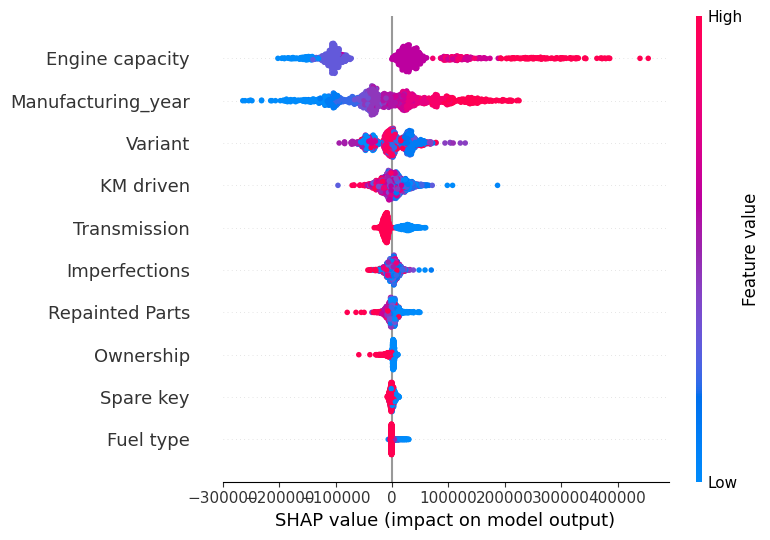

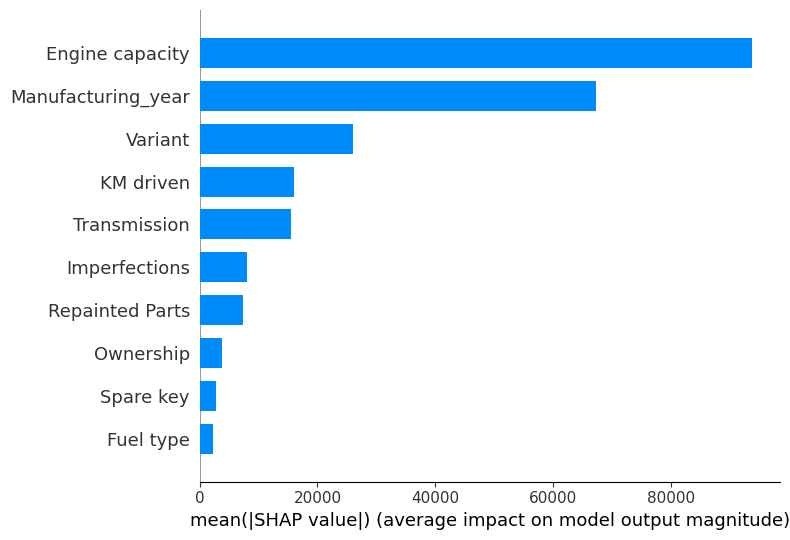

In [177]:
#Explainability of XGboost model
import shap

# Train the XGBoost model
xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

# Explain the predictions using SHAP
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_train)

# Summary plot of feature importance
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_train)

# Optional: Bar plot of mean feature importance
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_train, plot_type='bar')


## Predictor

In [180]:
from google.colab import widgets
from ipywidgets import interact_manual, Text, IntText, FloatText
import pandas as pd

# Assuming X_train, y_train, X_test, and the trained model already exist
cat_cols = ['Variant', 'Spare key', 'Transmission', 'Fuel type']
feature_order = X_test.columns  # Use X_test's exact column order

# Function to predict car price
def predict_price(model, input_data):
    input_df = pd.DataFrame([input_data])

    for col in cat_cols:
        if input_df[col].iloc[0] not in encoders[col].classes_:
            print(f"Value '{input_df[col].iloc[0]}' for '{col}' not found in training data!")
            return
        input_df[col] = encoders[col].transform(input_df[col])

    # Reorder columns to match X_test
    input_df = input_df[feature_order]

    prediction = model.predict(input_df)
    return prediction[0]

# Create input form with text fields for numerical inputs
@interact_manual(
    Manufacturing_year=IntText(value=2017, description='Year:'),
    Engine_capacity=IntText(value=998, description='Engine:'),
    Spare_key=Text(value='No', description='Spare Key:'),
    Transmission=Text(value='Manual', description='Transmission:'),
    KM_driven=IntText(value=60005, description='KM Driven:'),
    Ownership=IntText(value=3, description='Ownership:'),
    Fuel_type=Text(value='Petrol', description='Fuel Type:'),
    Imperfections=IntText(value=4, description='Imperfections:'),
    Repainted_Parts=IntText(value=13, description='Repainted Parts:'),
    Variant=Text(value='Ciaz', description='Variant:')
)
def car_price_predictor(Manufacturing_year, Engine_capacity, Spare_key, Transmission, KM_driven, Ownership, Fuel_type, Imperfections, Repainted_Parts, Variant):
    input_data = {
        'Manufacturing_year': Manufacturing_year,
        'Engine capacity': Engine_capacity,
        'Spare key': Spare_key,
        'Transmission': Transmission,
        'KM driven': KM_driven,
        'Ownership': Ownership,
        'Fuel type': Fuel_type,
        'Imperfections': Imperfections,
        'Repainted Parts': Repainted_Parts,
        'Variant': Variant
    }

    price = predict_price(model, input_data)

    if price is not None:
        print(f"Predicted Price: ₹{price:,.2f}")


interactive(children=(IntText(value=2017, description='Year:'), IntText(value=998, description='Engine:'), Tex…